# Problem 1. [50 points] Positive Semi-definite Matrices

## (a) [10 + 10 = 20 points] Matricial Outer Product

(i) Consider an arbitrary $Y\in\mathbb{R}^{m\times n}\setminus\{0\}$. **Prove that** $YY^{\top}\in\mathbb{S}^{m}_{+}$.

(ii) Consider an arbitrary $X\in\mathbb{S}^{m}_{+}$. **Prove that** we can always decompose $X$ as $X=YY^{\top}$ for some $Y\in\mathbb{R}^{m\times m}$. 

i. 
1. $Y Y^{T} = \mathbb{R}^{m\times n} \mathbb{R}^{n\times m} = \mathbb{R}^{m\times m}$, a square matrix
2. Let $X = Y Y^{T}$
\begin{align}
X^{T} & = (Y Y^{T})^{T} = (Y^{T})^{T} Y^{T} = Y Y^{T} = X \\
\Rightarrow X & = Y Y^{T} \in S^{m}
\end{align}
3. Let $\underline{v} \in R^{m}$, then
\begin{align}
\underline{v}^{T} Y Y^{T} \underline{v} & = (Y^{T} \underline{v})^{T} (Y^{T} \underline{v}) \\
& = \lVert Y^{T} \underline{v} \rVert_{2}^{2} \ge 0
\end{align}
then by definition $Y Y^{T} \in S_{+}^{m}$

ii.
1. From lecture 2 pg 12
\begin{align}
X & \in S_{+}^{m} \\
& \Rightarrow \quad \lambda_{i}(X) \ge 0 \quad \forall i=0..m \\
& \Rightarrow \quad \sqrt{\lambda_{i}(X)} \ge 0 \quad \forall i=0..m
\end{align}
2. For a real symmetric matrix such as $X$, the eigendecomposition exists of $X = P D P^{-1}$ where $P$ is orthogonal ($P^{-1} = P^{T}$) and $D$ is a diagonal matrix with the eigenvalues along the diagonal.
3. Define a diagonal matrix $K$ of the square root of X eigenvalues s.t. $K K^{T} = D$, entries will exist and be real and non-negative from 1.
4. Then it follows that:
\begin{align}
X & = P D P^{-1} \\
& = P K K^{T} P^{-1} \\
& = P K P^{-1} P K^{T} P^{-1} \\
& = P K P^{-1} (P^{-1})^{T} K^{T} P^{T} \\
& = P K P^{-1} (P K P^{-1})^{T} \\
& = Y Y^{T}, \quad Y = P K P^{-1} \in \mathbb{R}^{m \times m}
\end{align}
5. From 4., we see that given $X \in S_{+}^{m}$ and the eigendecomposition always exists with orthogonal $P$, then it follows that $X$ can always be decomposed into $Y Y^{T} \in \mathbb{R}^{m \times m}$

## (b) [(10 + 5) + 5 + 10 = 30 points] Set of $3\times 3$ Correlation Matrices

(i) In statistics, any $3\times 3$ correlation matrix is of the form $\begin{pmatrix}
1 & x & y\\
x & 1 & z\\
y & z & 1
\end{pmatrix}$ where the scalars $x,y,z$ are such that the matrix is positive semi-definite. So we can visualize the set of all $3\times 3$ correlation matrices as
$$\mathcal{X}:=\bigg\{(x,y,z)\in\mathbb{R}^{3}\mid \begin{pmatrix}
1 & x & y\\
x & 1 & z\\
y & z & 1
\end{pmatrix} \in \mathbb{S}^{3}_{+}\bigg\} \subset \mathbb{R}^{3}.$$
Use your favorite plotting tool (MATLAB/Python/Julia) to **make a 3D plot of $\mathcal{X}$** in the domain $[-1,1]^{3}$. **Briefly explain** the math behind your code.

(ii) **Mathematically argue why** $\mathcal{X}\subseteq [-1,1]^{3}$. "Mathematically" means argue with some inequalities etc. Don't just say "Duh! Look at my plot." :-)

(iii) **Prove that** $\mathcal{X} = \{(\cos\alpha,\cos\beta,\cos\gamma)\in\mathbb{R}^{3}\mid (\alpha,\beta,\gamma)\:\text{are the pairwise angles between three unit vectors in } \mathbb{R}^{3}\}$.

(Hint: Use what you proved in part (a)(ii).)

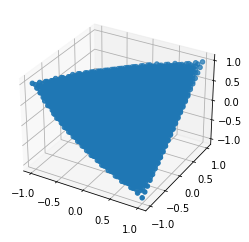

In [59]:
# i.
# construct the state-space as a discrete sampling of [-1, 1]^3
# define a function to test if x,y,z is in the set X (if it satisfies determinant checks)
# apply function to all states
# filter out states that are in set X, and scatter plot them

import matplotlib.pyplot as plt
import numpy as np

N = 25
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
z = np.linspace(-1, 1, N)

X, Y, Z = np.meshgrid(x, y, z)
X = X.reshape(-1)
Y = Y.reshape(-1)
Z = Z.reshape(-1)

def in_X(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]
    
    # delete nothing
    test0 = (1-z**2) - x*(x - y*z) + y * (x*z - y)

    # delete 1 row-col pair
    test1 = 1 - x**2
    test2 = 1 - y**2
    test3 = 1 - z**2
    
    # diagonal entries are 1, always > 0
    
    if test0 >= 0 and test1 >= 0 and test2 >= 0 and test3 >= 0:
        return True
    
    return False

state = np.vstack((X, Y, Z)).T

in_x_result = np.apply_along_axis(in_X, 1, state)

in_set = state[in_x_result]
out_set = state[np.logical_not(in_x_result)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(in_set[:, 0], in_set[:, 1], in_set[:, 2], marker='o')
# ax.scatter(out_set[:, 0], out_set[:, 1], out_set[:, 2], marker='o')

plt.show()

ii.
1. From Lec 2 pg 13, we know that $\mathcal{X} \in \mathcal{S}_{+}^{3} \Leftrightarrow$ all principal minors of $\mathcal{X} \ge 0$
2. In follows then that the determinants of the upper left 1x1, 2x2, and 3x3 matrices of $\begin{pmatrix}
1 & x & y\\
x & 1 & z\\
y & z & 1
\end{pmatrix}$ must be $\ge 0$
3. Then from definition of determinants:
\begin{align}
1 & \ge 0 \\
1 - x^{2} & \ge 0 \\
(1 - z^{2}) - x(x - zy) + y(xz - y) & \ge 0 \\
\end{align}
4. But we see that the three above inequalities do **not** always hold for every point in $[-1,1]^{3}$. Consider the point $(x, y, z) = (1, 1, -1)$
\begin{align}
1 & \ge 0 \\
1 - 1^{2} = 0 & \ge 0 \\
(1 - (-1)^{2}) - (1)(1 - (-1)(1)) + (1)((1)(-1) - 1) = 0 - 2 - 2 = -4 & < 0 \\
\end{align}
5. Then we see that there exists at least 1 point in the domain that is **outside** $\mathcal{X}$, therefore $\mathcal{X}\subseteq [-1,1]^{3}$

iii.
1. From Problem1.a.ii., any vector in $\mathcal{X}$ forms a symmetric matrix $P(x,  y, z)$ and can be decomposed as $Y Y^{T}$ for some $3x3$ matrix $Y$
<br>

2. Let $Y_{n:}$ denote the nth **row** of Y, and $Y_{:m}$ denote the mth **column** of Y
<br>

3. $P(x, y, z) = Y Y^{T} =
\begin{bmatrix}
Y_{1:} * Y^{T}_{:1} & Y_{1:} * Y^{T}_{:2} & Y_{1:} * Y^{T}_{:3} \\
Y_{2:} * Y^{T}_{:1} & Y_{2:} * Y^{T}_{:2} & Y_{2:} * Y^{T}_{:3} \\
Y_{3:} * Y^{T}_{:1} & Y_{3:} * Y^{T}_{:2} & Y_{3:} * Y^{T}_{:3}
\end{bmatrix} =
\begin{bmatrix}
Y_{1:} * Y_{1:} & Y_{1:} * Y_{2:} & Y_{1:} * Y_{3:} \\
Y_{2:} * Y_{1:} & Y_{2:} * Y_{2:} & Y_{2:} * Y_{3:} \\
Y_{3:} * Y_{1:} & Y_{3:} * Y_{2:} & Y_{3:} * Y_{3:}
\end{bmatrix}$
<br>

4. We see that every entry of $P(x, y, z)_{ij} = Y Y^{T} = Y_{i:} Y_{j:}$, the dot product between the $i$th **row vector** and the $j$th **row vector**.
<br>

5. Restating 4, $P(x, y, z)_{ij} = <Y_{i:}, Y_{j:}> = \|Y_{i:}\| \|Y_{j:}\| \cos(\theta)$ for some $\theta$ angle between the vectors $Y_{i:}, Y_{j:}$
<br>

6. By definition, $P(x, y, z)_{11} = P(x, y, z)_{22} = P(x, y, z)_{33} = 1$, then:
\begin{align}
<Y_{1:}, Y_{1:}> & = \|Y_{1:}\| \|Y_{1:}\| \cos(0) = \|Y_{1:}\|^{2} = 1 \\
& \Rightarrow \|Y_{1:}\| = 1 \\
& \Rightarrow \|Y_{2:}\| = \|Y_{3:}\| = 1
\end{align}
<br>
7. We've shown then that every vector in $\mathcal{X}$ corresponds to a symmetric matrix $P(x, y, z)$ that can be decomposed into $Y Y^{T}$ where the rows of $Y$ are unit vectors.
<br>
8. It follows that $P(x, y, z)_{ij} = <Y_{i:}, Y_{j:}> = \|Y_{i:}\| \|Y_{j:}\| \cos(\theta) = \cos(\theta)$ for $\theta$ angle between unit vectors $Y_{i:}, Y_{j:}$
<br>
9. From 8, the non-diagonal terms in $P$ can be written
\begin{align}
P(x, y, z)_{21} = \cos(Y_{2:}, Y_{1:}) = \cos(Y_{1:}, Y_{2:}) = P(x, y, z)_{12} = \cos(\alpha) \\
P(x, y, z)_{31} = \cos(Y_{3:}, Y_{1:}) = \cos(Y_{1:}, Y_{3:}) = P(x, y, z)_{13} = \cos(\beta) \\
P(x, y, z)_{23} = \cos(Y_{2:}, Y_{3:}) = \cos(Y_{3:}, Y_{2:}) = P(x, y, z)_{32} = \cos(\gamma) \\
\end{align}
<br>
10. Then we've shown that every vector $(x, y, z)$ in the set $\mathcal{X}$ can be rewritten as a symmetric matrix $P$ where the diagonal terms are 1, and non-diagonal terms are as in 8.

# Problem 2. [5 x 10 = 50 points] True/False: Norms

For each of the following, **state True/False**. If your answer is "True", then give a **short proof**. If your answer is "False", then give a **simple counter-example**.

(a) For all $x\in\mathbb{R}^{n}$, $Q\in {\rm{O}}(n)$, we have $\|Qx\|_{2} = \|x\|_{2}$.

(b) For all $x\in\mathbb{R}^{n}$, we have $\|x\|_{1} \geq \|x\|_{\infty}$.

(c) For all $x\in\mathbb{R}^{n}$, we have $\|x\|_2 = \sqrt{{\rm{tr}}(xx^{\top})}$.

(d) Let $0<p,q\leq \infty$ such that $p\neq q$. The identity $\|x\|_p = \|x\|_{q}$ holds for finitely many vectors $x\in\mathbb{R}^{n}$.

(e) Let $1\leq p < q\leq \infty$. The identity $\|x\|_p = n^{\frac{1}{p}-\frac{1}{q}}\|x\|_{q}$ holds for finitely many vectors $x\in\mathbb{R}^{n}$.

(f) Let $\sigma$ denote the vector comprising of the singular values of $X\in\mathbb{R}^{m\times n}$. Then $\|\sigma\|_{\infty} = \|X\|_{2}$.

(g) Let $\sigma$ denote the vector comprising of the singular values of $X\in\mathbb{R}^{m\times n}$. Then $\|\sigma\|_{0} = {\rm{rank}}(X)$.

(h) For all $X\in\mathbb{R}^{m\times n}$, we have $\|X\|_{1} \geq \|X\|_{\infty}$.

(i) For all $X\in\mathbb{R}^{n\times n}$, $Q\in {\rm{O}}(n)$, we have $\|QX\|_{\rm{F}} = \|X\|_{\rm{F}}$.

(j) For all $X\in\mathbb{R}^{n\times n}$, $Q\in {\rm{O}}(n)$, we have $\|QX\|_{2} = \|X\|_{2}$.

a. True
1. Eigenvalue of $Q$ is $\pm 1$ by definition, thus $Qx = \pm 1 x$, and $\|Qx\|_{2} = \|\pm1x\|_{2} = \|x\|_{2}$

b. True
1. $\|x\|_{1} = \|x\|_{\infty} + \left( \sum{ \lVert x_i \rVert \quad s.t. x_i < \|x\|_{\infty} } \right) = \|x\|_{\infty} + a$
2. By definition, $a \ge 0$, then
\begin{align}
\|x\|_{\infty} + a & \ge \|x\|_{\infty} \\
\|x\|_{1} & \ge \|x\|_{\infty}
\end{align} 

c. True
1. $Y = xx^{T} \Rightarrow Y_{ij} = x_{i} x_{j} \Rightarrow tr(Y) = tr(xx^{T}) = \sum{x_{i} x_{i}} = \sum{x_{i}^{2}} \Rightarrow \sqrt{tr(x x^{T})} = \sqrt{\sum{x_{i}^{2}} } = \| x \|_{2}$ 

d. False
1. Let $n = 2$, and $x = (2, 0)$
\begin{align}
\| x \|_{2} & = \sqrt{2^{2}} = 2 = \| x \|_{1} \\
\Rightarrow \alpha \| x \|_{2} & = \alpha \| x \|_{1} \\
\Rightarrow \| \alpha x \|_{2} & = \| \alpha x \|_{1} \quad \text{since scaling vector scales} \quad l_1, l_2 \quad \text{norm}\\
\end{align}
for **any** scalar $\alpha$ from $-\infty, +\infty$, then there are **infinitely** many vectors in $R^{n=2}$ where $\| x \|_{2} = \| x \|_{1}$

e. True
1. For arbitrary $n, p, q$, the scaling of vector $\| \alpha x \|_{p} \neq \alpha \|x\|_{p}$. Consider the counter example:
\begin{align}
x  & = (1, 1), q = 3 \\
\|x\|_{q} & = (1^3 + 1^3)^{\frac{1}{3}} = 2^{\frac{1}{3}} \\
\|2 x\|_{q} & = (2^3 + 2^3)^{\frac{1}{3}} = 16^{\frac{1}{3}} \neq 2 \times 2^{\frac{1}{3}}
\end{align}

f. True

\begin{align}
\|X\|_{2} & = \sup_{\|v\|_2 = 1}{ \|Xv\|_{2} } \\
& = \sup_{\|y\|_2 = 1}{ \|U\Sigma V^{T}y\|_{2} } \\
& = \sup_{\|y\|_2 = 1}{ \|\Sigma V^{T}y\|_{2} } \quad \text{since U is unitary} \\
& = \sup_{\|z\|_2 = 1}{ \|\Sigma z\|_{2} } \quad z = V^{T}y \quad, \text{V unitary thus} \quad \|z\|_2 = V^{T} \| y \|_2 \\
& = \sigma_{max}(X) \quad z = [1, 0...0]^{T} \quad \text{yields the max product, largest term of diagonal matrix } \Sigma, \sigma_{max}(X) \\
& = \|\sigma\|_{\infty}
\end{align}


g. True

1. $X = U \Sigma V^{T} \quad \text{SVD decomposition}$
2. Since $\Sigma$ is by definition a diagonal matrix of the singular values, $\| \sigma \|_{0} = rank(\Sigma)$
3. Since the matrices $U, V$ have inverses, they are full rank, and product with full rank matrix preserves rank
4. Then it follows that $rank(X) = rank(U \Sigma V^{T}) = rank(\Sigma) = \|\sigma\|_{0}$

h. False
\begin{align}
A & = \begin{bmatrix}
1 & 1 \\ 2 & 2
\end{bmatrix} \\
\|A\|_1 & = \max(3, 3) = 3 \\
\|A\|_{\infty} & = \max(2, 4) = 4 \\
\end{align}
We see then that for A, $\|A\|_{\infty} > \|A\|_{1}$, A is a counterexample

i.True
\begin{align}
\| QX \|_{F} & = \| \pm 1 X \|_{F} \\
& = \sqrt{ \sum_{i=1}^{n}{ \sum_{j=1}^{n}{ \lVert (\pm 1 x_{ij})^{2} \rVert } } } \\
& = \sqrt{ \sum_{i=1}^{n}{ \sum_{j=1}^{n}{ \lVert (x_{ij})^{2} \rVert } } } \\
& = \| X \|_{F}
\end{align}

j. True
\begin{align}
\|QX\|_{2} & = \sqrt{\lambda_{max}((QX)^{T}(QX))} \\
& = \sqrt{\lambda_{max}(X^{T} Q^{T} Q X )} \\
& = \sqrt{\lambda_{max}(X^{T} X )} \\
& = \| X \|_{2}
\end{align}